<a href="https://colab.research.google.com/github/ritika1000/Machine_learning_projects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

data collection and processing

In [6]:
car_dataset = pd.read_csv('/content/car data.csv')

In [7]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
print(car_dataset)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

In [9]:
car_dataset.shape

(301, 9)

In [10]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
print(car_dataset.Fuel_Type.value_counts() )
print(car_dataset.Seller_Type.value_counts() )
print(car_dataset.Transmission.value_counts() )

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [17]:
#encoding
car_dataset.replace({'Fuel_Type':{'Diesel':1 , 'Petrol':0,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0 , 'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0 , 'Automatic':1}},inplace=True)

In [18]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting data intp training and test value

In [22]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [26]:
print(X.shape,X_train.shape,X_test.shape)

(301, 7) (270, 7) (31, 7)


Model Evaluation

In [30]:
lin_model = LinearRegression()

In [31]:
lin_model.fit(X_train,Y_train)

LinearRegression()

In [33]:
X_train_pred = lin_model.predict(X_train)


In [37]:
# R sqaured error
error_score = metrics.r2_score(X_train_pred,Y_train)
print(error_score)

0.8635655509198777


Visualization acutal and predicted values

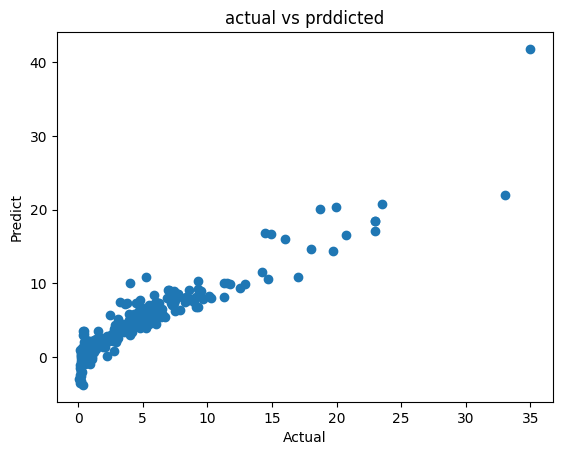

In [38]:
plt.scatter(Y_train,X_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.title("actual vs prddicted")
plt.show()

In [39]:
X_test_pred = lin_model.predict(X_test)
error_score = metrics.r2_score(X_test_pred,Y_test)
print(error_score)

0.8062199941176358


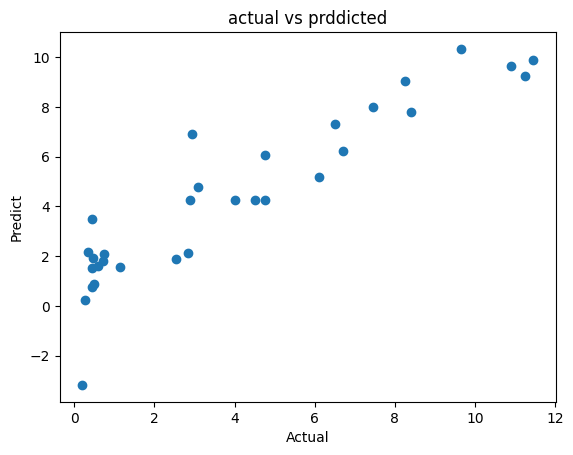

In [40]:
plt.scatter(Y_test,X_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.title("actual vs prddicted")
plt.show()

Lasso Regression

In [41]:
lasso_model = Lasso()

In [42]:
lasso_model.fit(X_train,Y_train)

Lasso()

In [43]:
X_test_pred = lasso_model.predict(X_test)
error_score = metrics.r2_score(X_test_pred,Y_test)
print(error_score)

0.7711110403265475


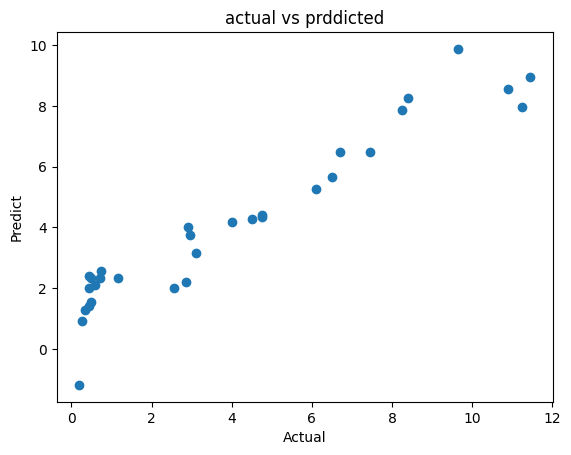

In [49]:
plt.scatter(Y_test,X_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.title("actual vs prddicted")
plt.show()

In [47]:
X_train_pred = lasso_model.predict(X_train)
error_score = metrics.r2_score(X_train_pred,Y_train)
print(error_score)

0.798459024070425


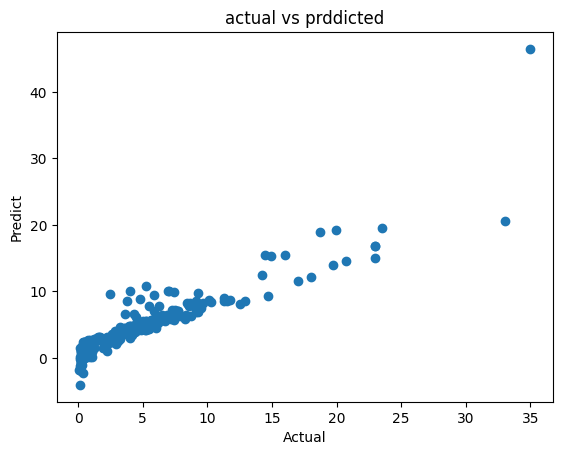

In [48]:
plt.scatter(Y_train,X_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.title("actual vs prddicted")
plt.show()